In [1]:
import pandas as pd # Importing Libraries for sampling and basic functions
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from imblearn.over_sampling import SMOTENC,RandomOverSampler,KMeansSMOTE
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler

In [2]:
from scipy.stats import skew
import pickle
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.api import add_constant

In [3]:
# Importing the test_train split library

from sklearn.model_selection import train_test_split
# importing the SMOTE library
from imblearn.over_sampling import SMOTE
# ML classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
# performance parameters
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report


In [44]:
df_hypo = pd.read_csv('data/allhypo.data', header = None, index_col = False)
df_hyper = pd.read_csv('data/allhyper.data', header = None, index_col = False)

In [45]:
df_hypo.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative.|3733
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative.|1442
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative.|2965
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative.|806
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative.|2807


In [46]:
df_hypo.shape

(2800, 30)

In [47]:
df_hypo.columns.unique()

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
           dtype='int64')

In [48]:
df_hyper.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,negative.|3733
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,negative.|1442
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,negative.|2965
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,negative.|806
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,negative.|2807


In [49]:
df_hyper.shape

(2800, 30)

In [50]:
#Defining the column names
import pandas as pd
# Define the column names
columns = ["age", "sex", "on thyroxine", "query on thyroxine", "on antithyroid medication", "sick", "pregnant",
"thyroid surgery", "I131 treatment", "query hypothyroid", "query hyperthyroid", "lithium", "goitre",
"tumor", "hypopituitary", "psych", "TSH measured", "TSH", "T3 measured", "T3", "TT4 measured", "TT4",
"T4U measured", "T4U", "FTI measured", "FTI", "TBG measured", "TBG","referral source", "labels"]

In [51]:
# Read the hypothyroid data into a Pandas DataFrame
df_hypo = pd.read_csv("data/allhypo.data", names=columns, na_values=["?"],index_col=False)
# Read the hyperthyroid data into a Pandas DataFrame
df_hyper = pd.read_csv("data/allhyper.data", names=columns, na_values=["?"],index_col=False)

In [52]:
# Print the column names of the hypothyroid DataFrame
print(df_hypo.columns)
# Print the first few rows of the hypothyroid DataFrame
print(df_hypo.head())
# Print the column names of the hyperthyroid DataFrame
print(df_hyper.columns)
# Print the first few rows of the hyperthyroid DataFrame
print(df_hyper.head())

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source',
       'labels'],
      dtype='object')
    age sex on thyroxine query on thyroxine on antithyroid medication sick  \
0  41.0   F            f                  f                         f    f   
1  23.0   F            f                  f                         f    f   
2  46.0   M            f                  f                         f    f   
3  70.0   F            t                  f                         f    f   
4  70.0   F            f                  f                         f    f   

  pregnant thyroid surgery I131 treatment query hypothyro

In [53]:
# Split the labels column into two columns: hypo_class and id
df_hypo[['hypo_class','id']] = df_hypo.labels.str.split("|",expand = True)
# Drop the labels column
df_hypo.drop('labels', axis = 1, inplace = True)
# Split the labels column into two columns: hyper_class and id
df_hyper[['hyper_class','id']] = df_hyper.labels.str.split("|",expand = True)
# Drop the labels column
df_hyper.drop('labels', axis = 1, inplace = True)

In [54]:
# Print the hypothyroid DataFrame
print(df_hypo.columns)
# Print the hyperthyroid DataFrame
print(df_hyper.columns)

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source',
       'hypo_class', 'id'],
      dtype='object')
Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source',
       'hyper_class', 'id'],
      dtype='object')


In [55]:
df_hypo['hypo_class'] = df_hypo['hypo_class'].str.replace('.', '')
df_hyper['hyper_class'] = df_hyper['hyper_class'].str.replace('.', '')

<ipython-input-55-714a279e623f>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_hypo['hypo_class'] = df_hypo['hypo_class'].str.replace('.', '')
<ipython-input-55-714a279e623f>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_hyper['hyper_class'] = df_hyper['hyper_class'].str.replace('.', '')


In [56]:
df_hypo_copy = df_hypo.copy(deep=True)
df_hyper_copy = df_hyper.copy(deep=True)

In [57]:
print(df_hypo['hypo_class'].unique())
print(df_hyper['hyper_class'].unique())

['negative' 'compensated hypothyroid' 'primary hypothyroid'
 'secondary hypothyroid']
['negative' 'hyperthyroid' 'T3 toxic' 'goitre']


In [58]:
df_hypo.replace(['compensated hypothyroid', 'primary hypothyroid',\
'secondary hypothyroid'], 'hypothyroid', inplace = True)

In [59]:
df_hyper.replace(['T3 toxic', 'goitre'], 'hyperthyroid', inplace = True)

In [60]:
df_concat = pd.concat([df_hypo, df_hyper.iloc[:, -2]], axis=1)
df_concat.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,hypo_class,id,hyper_class
0,41.0,F,f,f,f,f,f,f,f,f,...,t,1.14,t,109.0,f,NaN,SVHC,negative,3733,negative
1,23.0,F,f,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,other,negative,1442,negative
2,46.0,M,f,f,f,f,f,f,f,f,...,t,0.91,t,120.0,f,NaN,other,negative,2965,negative
3,70.0,F,t,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,other,negative,806,negative
4,70.0,F,f,f,f,f,f,f,f,f,...,t,0.87,t,70.0,f,NaN,SVI,negative,2807,negative


In [61]:
df_concat.shape

(2800, 32)

In [62]:
df_new = df_concat.copy(deep = True)

In [63]:
df_new.to_csv('data/df_new.csv', index = False)


In [64]:
df_concat['labels'] = np.where(((df_concat['hypo_class'] != 'negative') & \
(df_concat['hyper_class'] == 'negative')),df_concat['hypo_class'],\
np.where((df_concat['hyper_class'] != 'negative'),df_concat['hyper_class'],'negative'))

In [65]:
df_concat.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T4U,FTI measured,FTI,TBG measured,TBG,referral source,hypo_class,id,hyper_class,labels
0,41.0,F,f,f,f,f,f,f,f,f,...,1.14,t,109.0,f,NaN,SVHC,negative,3733,negative,negative
1,23.0,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,other,negative,1442,negative,negative
2,46.0,M,f,f,f,f,f,f,f,f,...,0.91,t,120.0,f,NaN,other,negative,2965,negative,negative
3,70.0,F,t,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,other,negative,806,negative,negative
4,70.0,F,f,f,f,f,f,f,f,f,...,0.87,t,70.0,f,NaN,SVI,negative,2807,negative,negative


In [66]:
df = df_concat.drop(['referral source', 'TBG', 'hypo_class', 'id','hyper_class'], axis = 1)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        2799 non-null   float64
 1   sex                        2690 non-null   object 
 2   on thyroxine               2800 non-null   object 
 3   query on thyroxine         2800 non-null   object 
 4   on antithyroid medication  2800 non-null   object 
 5   sick                       2800 non-null   object 
 6   pregnant                   2800 non-null   object 
 7   thyroid surgery            2800 non-null   object 
 8   I131 treatment             2800 non-null   object 
 9   query hypothyroid          2800 non-null   object 
 10  query hyperthyroid         2800 non-null   object 
 11  lithium                    2800 non-null   object 
 12  goitre                     2800 non-null   object 
 13  tumor                      2800 non-null   objec

In [68]:
df[['TSH measured', 'TSH']].tail(10)

,TSH measured,TSH
2790,t,2.10
2791,t,1.00
2792,f,NaN
2793,t,0.03
2794,t,1.90
2795,t,2.70
2796,f,NaN
2797,f,NaN
2798,t,1.40
2799,t,1.20


In [69]:
df = df.drop(['TSH measured','T3 measured','TT4 measured','T4U measured',\
'FTI measured','TBG measured'], axis = 1)

In [70]:
df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,labels
0,41.0,F,f,f,f,f,f,f,f,f,...,f,f,f,f,1.30,2.5,125.0,1.14,109.0,negative
1,23.0,F,f,f,f,f,f,f,f,f,...,f,f,f,f,4.10,2.0,102.0,NaN,NaN,negative
2,46.0,M,f,f,f,f,f,f,f,f,...,f,f,f,f,0.98,NaN,109.0,0.91,120.0,negative
3,70.0,F,t,f,f,f,f,f,f,f,...,f,f,f,f,0.16,1.9,175.0,NaN,NaN,negative
4,70.0,F,f,f,f,f,f,f,f,f,...,f,f,f,f,0.72,1.2,61.0,0.87,70.0,negative


In [71]:
#Types of dataset

cat_features = [i for i in df.columns if (df[i].dtype == 'O')]
cat_features

['sex',
 'on thyroxine',
 'query on thyroxine',
 'on antithyroid medication',
 'sick',
 'pregnant',
 'thyroid surgery',
 'I131 treatment',
 'query hypothyroid',
 'query hyperthyroid',
 'lithium',
 'goitre',
 'tumor',
 'hypopituitary',
 'psych',
 'labels']

In [72]:
len(cat_features)

16

In [73]:
num_features = [i for i in df.columns if (df[i].dtype != 'O')]
num_features

['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

In [75]:
for i in cat_features:
  print('==='*20)
  print(i, 'feature','unique values:', df[i].unique())

print('==='*20)



sex feature unique values: ['F' 'M' nan]
on thyroxine feature unique values: ['f' 't']
query on thyroxine feature unique values: ['f' 't']
on antithyroid medication feature unique values: ['f' 't']
sick feature unique values: ['f' 't']
pregnant feature unique values: ['f' 't']
thyroid surgery feature unique values: ['f' 't']
I131 treatment feature unique values: ['f' 't']
query hypothyroid feature unique values: ['f' 't']
query hyperthyroid feature unique values: ['f' 't']
lithium feature unique values: ['f' 't']
goitre feature unique values: ['f' 't']
tumor feature unique values: ['f' 't']
hypopituitary feature unique values: ['f' 't']
psych feature unique values: ['f' 't']
labels feature unique values: ['negative' 'hypothyroid' 'hyperthyroid']


In [76]:
for i in num_features:
  print('==='*12)
  print(i, 'feature: unique values:', len(df[i].unique()))

print('==='*12)


age feature: unique values: 94
TSH feature: unique values: 264
T3 feature: unique values: 65
TT4 feature: unique values: 218
T4U feature: unique values: 139
FTI feature: unique values: 210


In [77]:
for i in num_features:
  print('==='*12)
  print(i, 'feature: minimum value: ', min(df[i].unique()))
  print(i, 'feature: maximum value: ', max(df[i].unique()))

print('==='*12)

age feature: minimum value:  1.0
age feature: maximum value:  455.0
TSH feature: minimum value:  0.005
TSH feature: maximum value:  478.0
T3 feature: minimum value:  0.05
T3 feature: maximum value:  10.6
TT4 feature: minimum value:  2.0
TT4 feature: maximum value:  430.0
T4U feature: minimum value:  0.31
T4U feature: maximum value:  2.12
FTI feature: minimum value:  2.0
FTI feature: maximum value:  395.0


In [78]:
df.describe()

,age,TSH,T3,TT4,T4U,FTI
count,2799.00000,2516.000000,2215.000000,2616.000000,2503.000000,2505.000000
mean,51.84423,4.672150,2.024966,109.072401,0.997912,110.787984
std,20.46116,21.449453,0.824600,35.392443,0.194390,32.883986
min,1.00000,0.005000,0.050000,2.000000,0.310000,2.000000
25%,36.00000,0.440000,1.600000,88.000000,0.880000,93.000000
50%,54.00000,1.400000,2.000000,104.000000,0.980000,107.000000
75%,67.00000,2.600000,2.400000,125.000000,1.080000,124.000000
max,455.00000,478.000000,10.600000,430.000000,2.120000,395.000000


In [79]:
#Categorical data
df.describe(include = 'object')


,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,labels
count,2690,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3
top,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,negative
freq,1830,2470,2760,2766,2690,2759,2761,2752,2637,2627,2786,2775,2729,2799,2665,2503


In [80]:
df.isnull().sum()

age                            1
sex                          110
on thyroxine                   0
query on thyroxine             0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
query hypothyroid              0
query hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH                          284
T3                           585
TT4                          184
T4U                          297
FTI                          295
labels                         0
dtype: int64

In [81]:
numerical_null = [i for i in df.columns if (df[i].dtype != 'O' and df[i].isnull().sum() != 0)]
numerical_null

['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

In [82]:
df[df['age'].isnull()]

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,labels
1985,NaN,F,t,f,f,f,f,f,t,f,...,f,f,f,f,0.6,1.5,120.0,0.82,146.0,negative


In [83]:
df['age'].replace([np.nan],df['age'].median(), inplace = True)

In [84]:
numerical_null = [i for i in df.columns if (df[i].dtype != 'O' and df[i].isnull().sum() != 0)]
numerical_null

['TSH', 'T3', 'TT4', 'T4U', 'FTI']

In [85]:
for i in numerical_null:
  df[i].fillna(df[i].median(),inplace = True)

In [86]:
categorical = [i for i in df.columns if df[i].dtype == 'O']
categorical

['sex',
 'on thyroxine',
 'query on thyroxine',
 'on antithyroid medication',
 'sick',
 'pregnant',
 'thyroid surgery',
 'I131 treatment',
 'query hypothyroid',
 'query hyperthyroid',
 'lithium',
 'goitre',
 'tumor',
 'hypopituitary',
 'psych',
 'labels']

In [87]:
categorical_null = [i for i in df.columns if (df[i].dtype == 'O' and df[i].isnull().sum() != 0)]
categorical_null

['sex']

In [88]:
for i in categorical_null:
  df[i].fillna(df[i].mode()[0], inplace = True)

In [89]:
df[categorical_null].isnull().any()

sex    False
dtype: bool

In [90]:
df.isnull().sum().any()

False

In [91]:
df.isnull().sum().sum()

0

In [92]:
# Data Transformation
numerical_all = [i for i in df.columns if (df[i].dtype != 'O')]
numerical_all

['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

In [95]:
df_filled = df.copy(deep = True)
plt.style.use('dark_background')

In [99]:
def checkPlot(dataframe, feat):
    m = []
    # print("-------LOG Transformation-------")
    log_target = np.log1p(dataframe[feat])
    df_filled['log_'+feat] = pd.DataFrame(log_target)
    plt.rcParams["figure.figsize"] = 13,5
    fig,ax = plt.subplots(1,2)
    sns.distplot(dataframe[feat], label= "Orginal Skew:{0}".format(np.round(skew(dataframe[feat]),4)), color="r", ax=ax[0], axlabel="ORGINAL")
    sns.distplot(log_target, label= "Transformed Skew:{0}".format(np.round(skew(log_target),4)), color="b", ax=ax[1], axlabel="LOG TRANSFORMED")
    fig.legend()
    m.append(np.round(skew(log_target),4))
    # print("-------Square Root Transformation-------")
    sqrrt_target = dataframe[feat]**(1/2)
    df_filled['sqrroot_'+feat] = pd.DataFrame(sqrrt_target)
    plt.rcParams["figure.figsize"] = 13,5
    fig,ax = plt.subplots(1,2)
    sns.distplot(dataframe[feat], label= "Orginal Skew:{0}".format(np.round(skew(dataframe[feat]),4)), color="r", ax=ax[0], axlabel="ORGINAL")
    sns.distplot(sqrrt_target, label= "Transformed Skew:{0}".format(np.round(skew(sqrrt_target),4)), color="b", ax=ax[1], axlabel="SQUARE ROOT TRANSFORMED")
    fig.legend()
    m.append(np.round(skew(sqrrt_target),4))
    print(m)

In [100]:
import warnings
warnings.filterwarnings('ignore')

 Plots after transformations for col :  age
[-1.6923, -0.3571]
 Plots after transformations for col :  TSH
[1.9841, 5.6563]
 Plots after transformations for col :  T3
[-0.4276, -0.0556]
 Plots after transformations for col :  TT4
[-2.4147, -0.0814]
 Plots after transformations for col :  T4U
[0.7396, 0.745]
 Plots after transformations for col :  FTI
[-3.045, -0.1901]


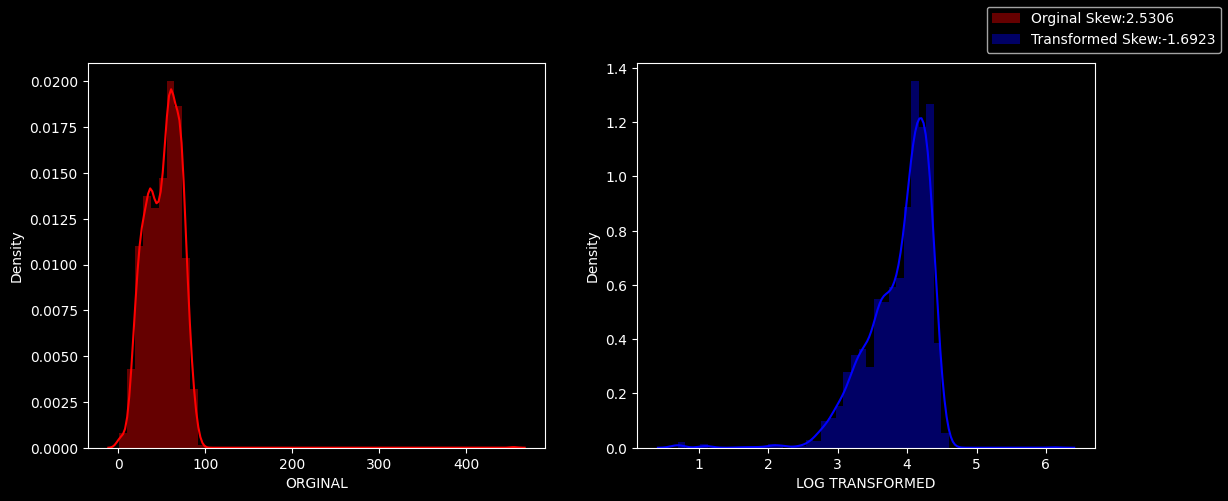

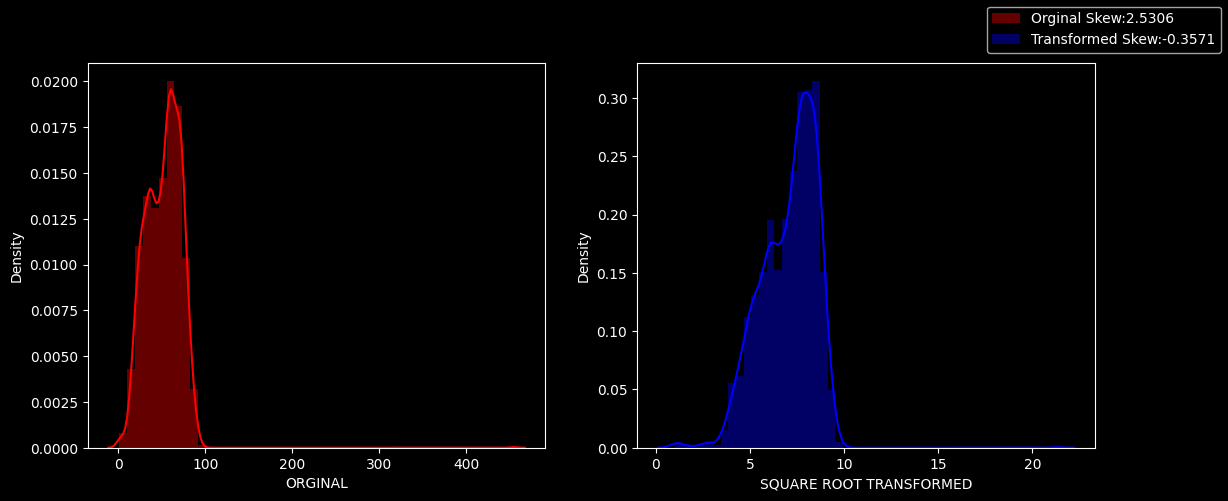

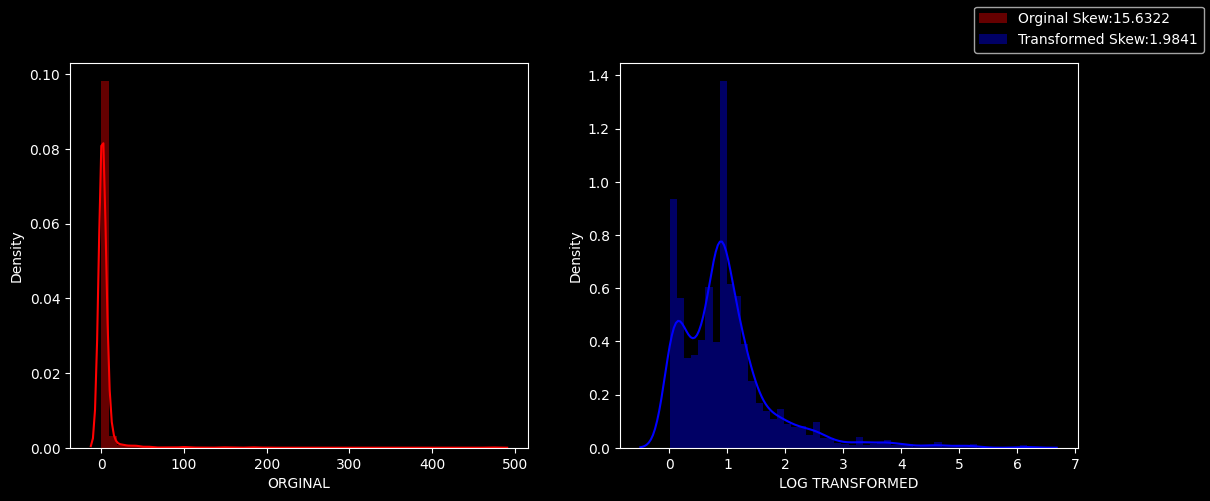

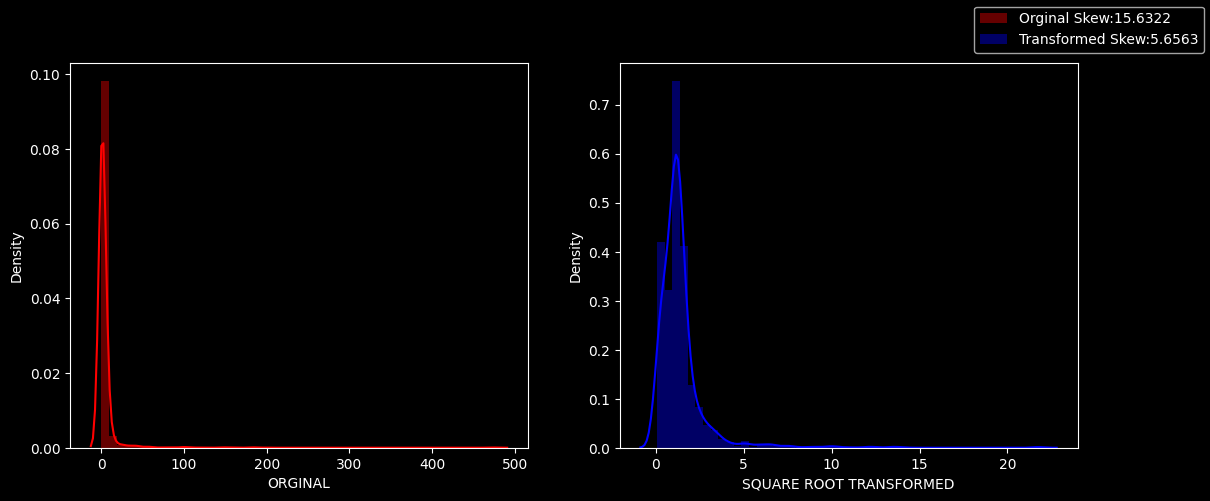

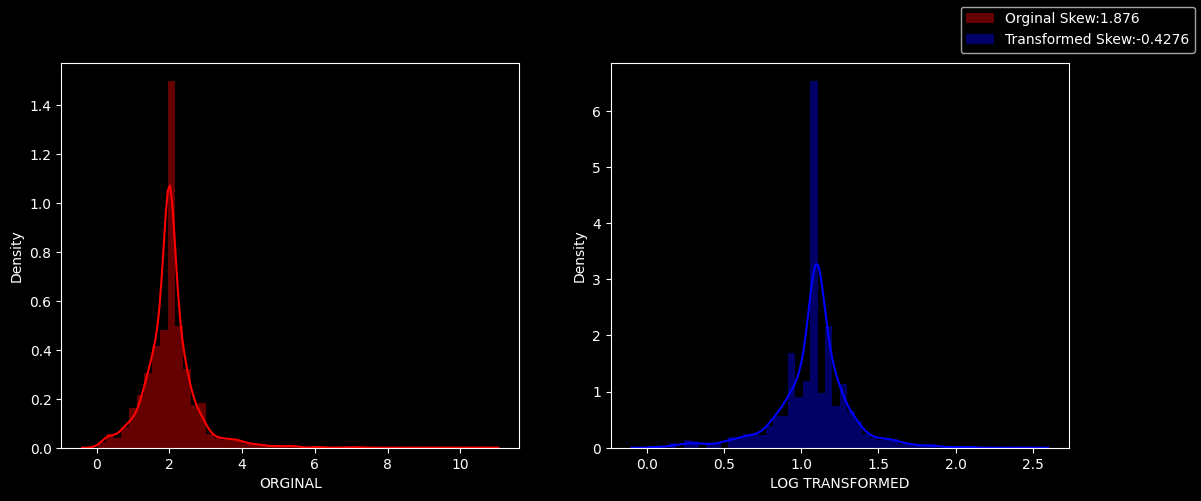

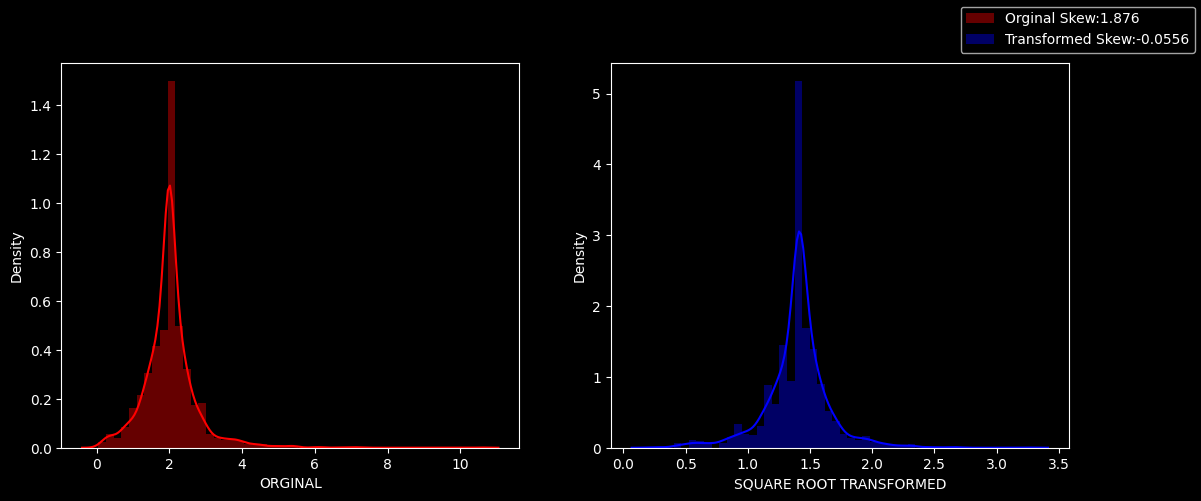

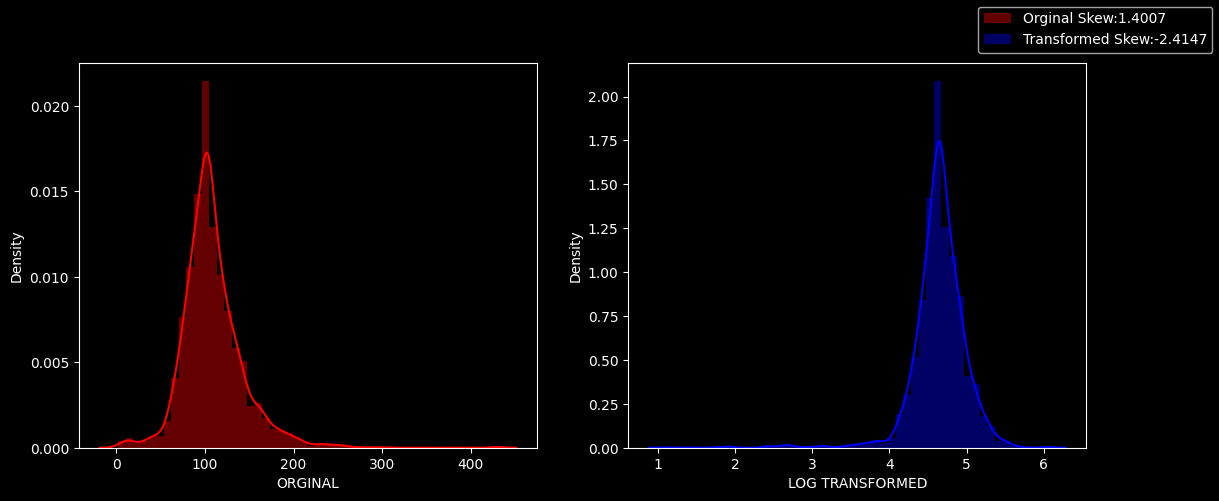

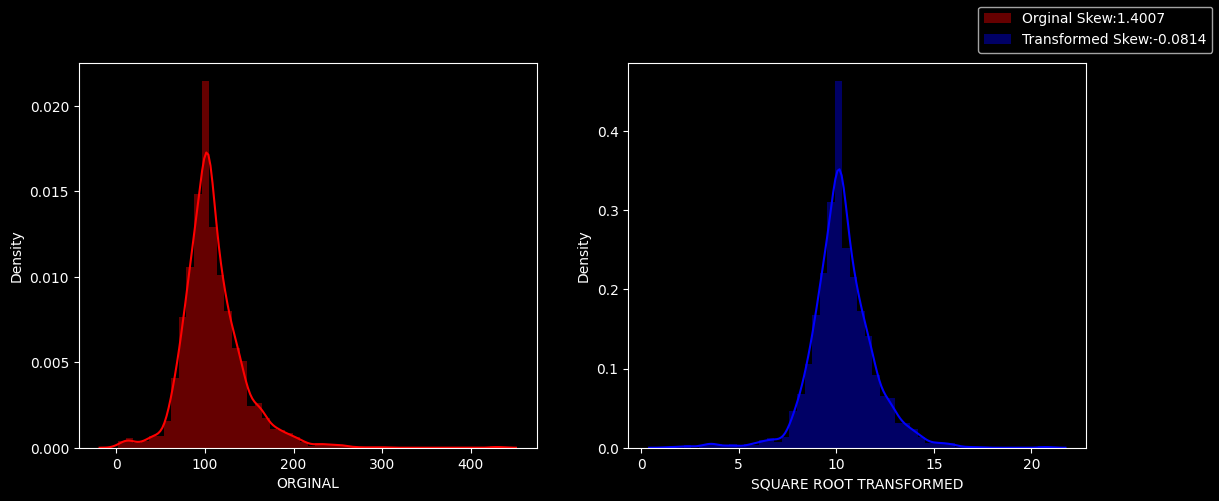

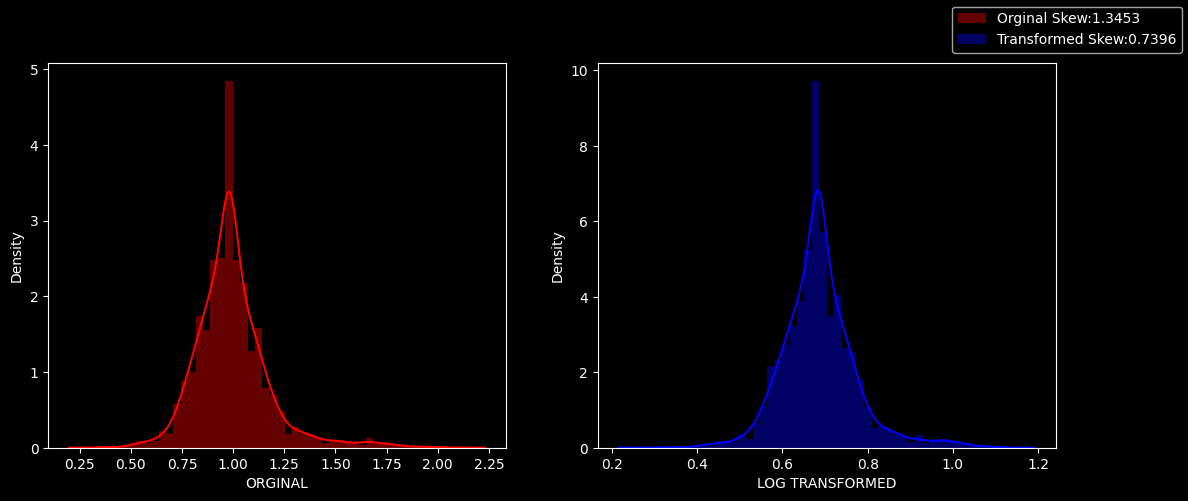

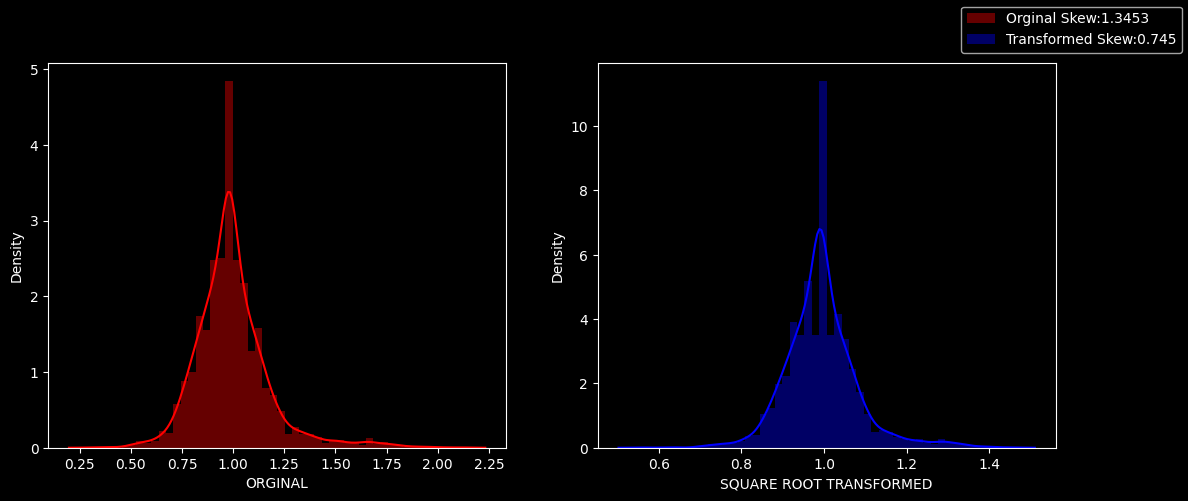

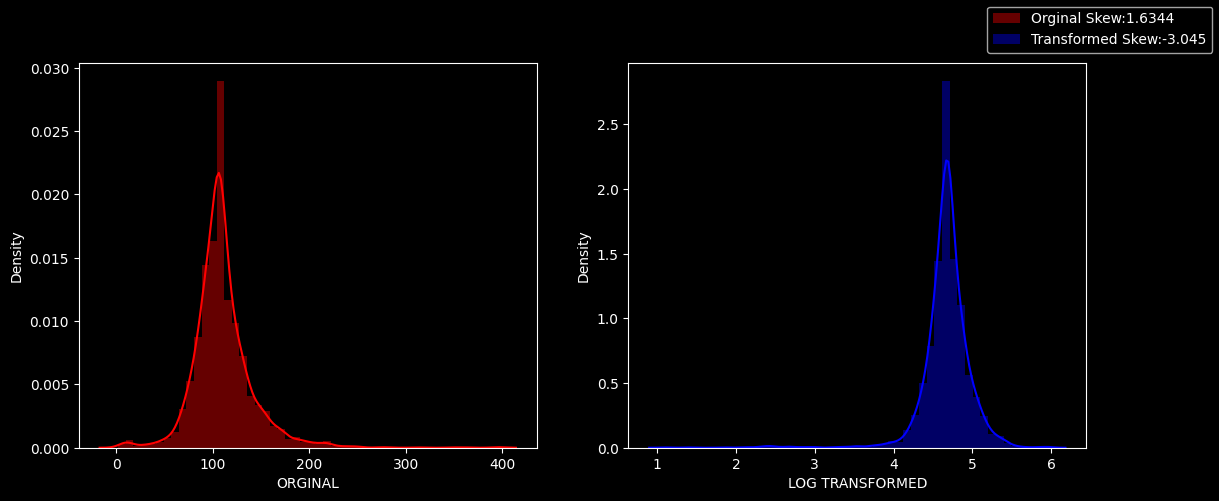

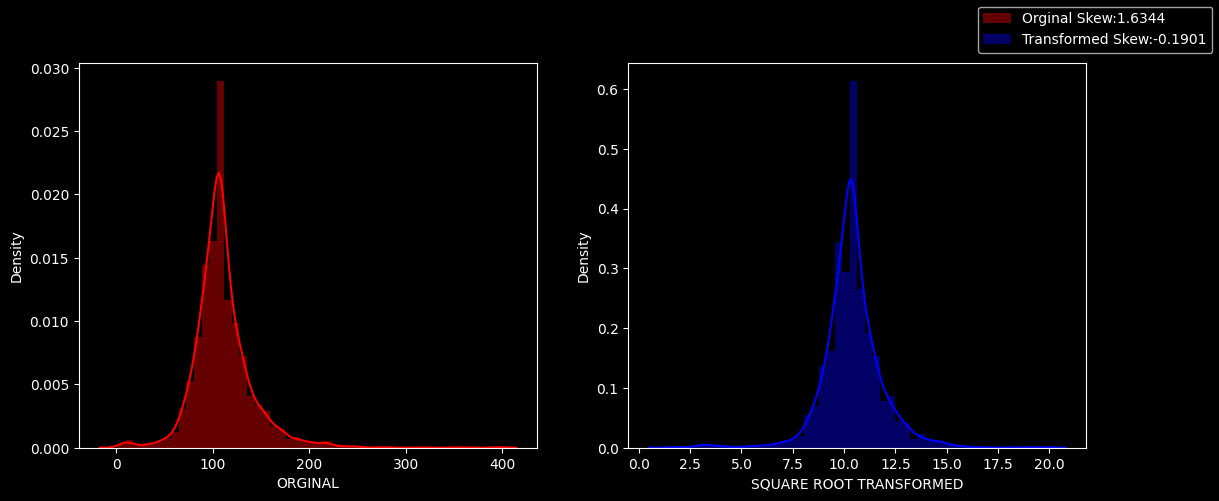

In [101]:
for i in df_filled[numerical_all]:
  print(" Plots after transformations for col : ", i)
  checkPlot(df_filled, i)

In [102]:
df_transformed = df_filled.copy(deep = True)

In [103]:
df_transformed.columns

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U',
       'FTI', 'labels', 'log_age', 'sqrroot_age', 'log_TSH', 'sqrroot_TSH',
       'log_T3', 'sqrroot_T3', 'log_TT4', 'sqrroot_TT4', 'log_T4U',
       'sqrroot_T4U', 'log_FTI', 'sqrroot_FTI'],
      dtype='object')

In [104]:
df_transformed.shape

(2800, 34)

In [106]:
df_transformed.drop(['age', 'log_age', \
                     'TSH', 'sqrroot_TSH', \
                     'T3', 'log_T3', \
                     'TT4', 'log_TT4', \
                     'T4U', 'sqrroot_T4U',\
                     'FTI', 'log_FTI'], axis = 1, inplace = True)



In [107]:
df_transformed.columns

Index(['sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'labels', 'sqrroot_age',
       'log_TSH', 'sqrroot_T3', 'sqrroot_TT4', 'log_T4U', 'sqrroot_FTI'],
      dtype='object')

In [108]:
df_transformed.shape

(2800, 22)

In [110]:
# Data Encoding
df_transformed_cat = df_transformed.select_dtypes(include =['object','category'])
df_transformed_cat.columns

Index(['sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'labels'],
      dtype='object')

In [111]:
df_transformed_cat.shape

(2800, 16)

In [112]:
#Applying Onehotencoding
df_onehot_encoded = pd.get_dummies(df_transformed_cat.iloc[:,:-1], drop_first = True)

In [113]:
df_onehot_encoded.columns

Index(['sex_M', 'on thyroxine_t', 'query on thyroxine_t',
       'on antithyroid medication_t', 'sick_t', 'pregnant_t',
       'thyroid surgery_t', 'I131 treatment_t', 'query hypothyroid_t',
       'query hyperthyroid_t', 'lithium_t', 'goitre_t', 'tumor_t',
       'hypopituitary_t', 'psych_t'],
      dtype='object')

In [114]:
df_onehot_encoded.shape

(2800, 15)

In [115]:
df_transformed_label = pd.DataFrame(df_transformed_cat.iloc[:,-1])
df_transformed_label.head()

,labels
0,negative
1,negative
2,negative
3,negative
4,negative


In [117]:
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder_random_forest = preprocessing.LabelEncoder()
# Encode labels in column 'labels'.
df_transformed_label['labels']= label_encoder_random_forest.fit_transform(df_transformed_label)
# we will save the encoder as pickle to use when we do the prediction. We will need to decode the predcited values
# back to original
file = "label_encoder_random_forest.pickle"
pickle.dump(label_encoder_random_forest, open(file, "wb"))


In [118]:
df_transformed_label['labels'].unique()

array([2, 1, 0])

In [119]:
list (label_encoder_random_forest.inverse_transform([2, 1, 0]))
# ['negative', 'hypothyroid', 'hyperthyroid']

[2, 1, 0]

In [120]:
df_transformed_label.head()

,labels
0,2
1,2
2,2
3,2
4,2


In [121]:
df_onehot_encoded.head()

,sex_M,on thyroxine_t,query on thyroxine_t,on antithyroid medication_t,sick_t,pregnant_t,thyroid surgery_t,I131 treatment_t,query hypothyroid_t,query hyperthyroid_t,lithium_t,goitre_t,tumor_t,hypopituitary_t,psych_t
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [123]:
df_encoded_cat = pd.concat([df_onehot_encoded, df_transformed_label], axis = 1)
df_encoded_cat.head()

,sex_M,on thyroxine_t,query on thyroxine_t,on antithyroid medication_t,sick_t,pregnant_t,thyroid surgery_t,I131 treatment_t,query hypothyroid_t,query hyperthyroid_t,lithium_t,goitre_t,tumor_t,hypopituitary_t,psych_t,labels
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


In [124]:
#Multi Colinearity
df_numerical = df_transformed.select_dtypes(include = np.number)
df_numerical.head()

,sqrroot_age,log_TSH,sqrroot_T3,sqrroot_TT4,log_T4U,sqrroot_FTI
0,6.403124,0.832909,1.581139,11.180340,0.760806,10.440307
1,4.795832,1.629241,1.414214,10.099505,0.683097,10.344080
2,6.782330,0.683097,1.414214,10.440307,0.647103,10.954451
3,8.366600,0.148420,1.378405,13.228757,0.683097,10.344080
4,8.366600,0.542324,1.095445,7.810250,0.625938,8.366600


In [125]:
def calculate_vif(X):
  # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [ variance_inflation_factor(X.values, i) for i in range(X.shape[1]) ]
   return(vif)


In [126]:
calculate_vif(df_numerical)

,variables,VIF
0,sqrroot_age,23.879352
1,log_TSH,3.341043
2,sqrroot_T3,49.171247
3,sqrroot_TT4,282.213577
4,log_T4U,112.040640
5,sqrroot_FTI,183.589494


In [127]:
df_numerical_constant = df_numerical.copy(deep = True)

In [128]:
df_numerical_constant['constant'] = 1
## adding 1 constant in our dataset.

In [129]:
df_numerical_constant.head()

,sqrroot_age,log_TSH,sqrroot_T3,sqrroot_TT4,log_T4U,sqrroot_FTI,constant
0,6.403124,0.832909,1.581139,11.180340,0.760806,10.440307,1
1,4.795832,1.629241,1.414214,10.099505,0.683097,10.344080,1
2,6.782330,0.683097,1.414214,10.440307,0.647103,10.954451,1
3,8.366600,0.148420,1.378405,13.228757,0.683097,10.344080,1
4,8.366600,0.542324,1.095445,7.810250,0.625938,8.366600,1


In [130]:
calculate_vif(df_numerical_constant)

,variables,VIF
0,sqrroot_age,1.079170
1,log_TSH,1.420100
2,sqrroot_T3,1.608135
3,sqrroot_TT4,17.571336
4,log_T4U,6.915051
5,sqrroot_FTI,14.999932
6,constant,521.505157


In [131]:
df_numerical_constant.drop('sqrroot_TT4', axis = 1, inplace = True)
calculate_vif(df_numerical_constant)

,variables,VIF
0,sqrroot_age,1.078160
1,log_TSH,1.395940
2,sqrroot_T3,1.607507
3,log_T4U,1.410238
4,sqrroot_FTI,1.545203
5,constant,206.999885


In [132]:
df_numerical_final = df_numerical_constant.drop('constant', axis = 1)
df_numerical_final.head()

,sqrroot_age,log_TSH,sqrroot_T3,log_T4U,sqrroot_FTI
0,6.403124,0.832909,1.581139,0.760806,10.440307
1,4.795832,1.629241,1.414214,0.683097,10.344080
2,6.782330,0.683097,1.414214,0.647103,10.954451
3,8.366600,0.148420,1.378405,0.683097,10.344080
4,8.366600,0.542324,1.095445,0.625938,8.366600


In [133]:
df_categorical_final = df_encoded_cat.copy(deep = True)
df_categorical_final.head()
# final dataset with categorical features

,sex_M,on thyroxine_t,query on thyroxine_t,on antithyroid medication_t,sick_t,pregnant_t,thyroid surgery_t,I131 treatment_t,query hypothyroid_t,query hyperthyroid_t,lithium_t,goitre_t,tumor_t,hypopituitary_t,psych_t,labels
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


In [134]:
df_final = pd.concat([df_numerical_final, df_categorical_final], axis = 1)
# final dataset - 2800x21

In [135]:
df_final.head()

,sqrroot_age,log_TSH,sqrroot_T3,log_T4U,sqrroot_FTI,sex_M,on thyroxine_t,query on thyroxine_t,on antithyroid medication_t,sick_t,...,thyroid surgery_t,I131 treatment_t,query hypothyroid_t,query hyperthyroid_t,lithium_t,goitre_t,tumor_t,hypopituitary_t,psych_t,labels
0,6.403124,0.832909,1.581139,0.760806,10.440307,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,4.795832,1.629241,1.414214,0.683097,10.344080,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,6.782330,0.683097,1.414214,0.647103,10.954451,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,8.366600,0.148420,1.378405,0.683097,10.344080,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,8.366600,0.542324,1.095445,0.625938,8.366600,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [136]:
df_final.columns

Index(['sqrroot_age', 'log_TSH', 'sqrroot_T3', 'log_T4U', 'sqrroot_FTI',
       'sex_M', 'on thyroxine_t', 'query on thyroxine_t',
       'on antithyroid medication_t', 'sick_t', 'pregnant_t',
       'thyroid surgery_t', 'I131 treatment_t', 'query hypothyroid_t',
       'query hyperthyroid_t', 'lithium_t', 'goitre_t', 'tumor_t',
       'hypopituitary_t', 'psych_t', 'labels'],
      dtype='object')

In [137]:
# checking the total value of each target class
# negative - 2
# hyporthyroid - 1
# hyperthyroid - 0
df_final.labels.value_counts()

2    2503
1     220
0      77
Name: labels, dtype: int64

In [138]:
df_final.columns

Index(['sqrroot_age', 'log_TSH', 'sqrroot_T3', 'log_T4U', 'sqrroot_FTI',
       'sex_M', 'on thyroxine_t', 'query on thyroxine_t',
       'on antithyroid medication_t', 'sick_t', 'pregnant_t',
       'thyroid surgery_t', 'I131 treatment_t', 'query hypothyroid_t',
       'query hyperthyroid_t', 'lithium_t', 'goitre_t', 'tumor_t',
       'hypopituitary_t', 'psych_t', 'labels'],
      dtype='object')

In [139]:
df.columns

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U',
       'FTI', 'labels'],
      dtype='object')

In [141]:
df_final.rename({'sqrroot_age': 'age', 'log_TSH': 'TSH', 'sqrroot_T3': 'T3', \
                 'log_T4U': 'T4U', 'sqrroot_FTI' : 'FTI', 'sex_M' : 'sex', \
                 'on thyroxine_t' : 'onthyroxine', 'query on thyroxine_t' :
                 'queryonthyroxine',\

                 'on antithyroid medication_t' : 'onantithyroidmedication', \
                 'sick_t' : 'sick', 'pregnant_t' : 'pregnant', 'thyroid surgery_t' : 'thyroidsurgery', \
                 'I131 treatment_t' : 'I131treatment', 'query hypothyroid_t' :
                 'queryhypothyroid', \
                 'query hyperthyroid_t' : 'queryhyperthyroid', 'lithium_t' :
                 'lithium', \
                 'goitre_t' : 'goitre', 'tumor_t' : 'tumor', 'hypopituitary_t' : 'hypopituitary', \
                 'psych_t' : 'psych'}, axis = 1, inplace = True)

In [142]:
df_final.head()

,age,TSH,T3,T4U,FTI,sex,onthyroxine,queryonthyroxine,onantithyroidmedication,sick,...,thyroidsurgery,I131treatment,queryhypothyroid,queryhyperthyroid,lithium,goitre,tumor,hypopituitary,psych,labels
0,6.403124,0.832909,1.581139,0.760806,10.440307,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,4.795832,1.629241,1.414214,0.683097,10.344080,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,6.782330,0.683097,1.414214,0.647103,10.954451,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,8.366600,0.148420,1.378405,0.683097,10.344080,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,8.366600,0.542324,1.095445,0.625938,8.366600,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [143]:
df_final.columns

Index(['age', 'TSH', 'T3', 'T4U', 'FTI', 'sex', 'onthyroxine',
       'queryonthyroxine', 'onantithyroidmedication', 'sick', 'pregnant',
       'thyroidsurgery', 'I131treatment', 'queryhypothyroid',
       'queryhyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary',
       'psych', 'labels'],
      dtype='object')

In [144]:
df_temp = df_final.copy(deep = True)

In [146]:
column_names = ["age", "sex", "TSH", "T3", "T4U", "FTI", \
                "onthyroxine", "queryonthyroxine", "onantithyroidmedication", \
                "sick", "pregnant", \
                "thyroidsurgery", "I131treatment", "queryhypothyroid","queryhyperthyroid", \
                "lithium", "goitre", "tumor","hypopituitary","psych", "labels"]

In [147]:
df_final = df_final.reindex(columns = column_names)

In [148]:
df_final.columns

Index(['age', 'sex', 'TSH', 'T3', 'T4U', 'FTI', 'onthyroxine',
       'queryonthyroxine', 'onantithyroidmedication', 'sick', 'pregnant',
       'thyroidsurgery', 'I131treatment', 'queryhypothyroid',
       'queryhyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary',
       'psych', 'labels'],
      dtype='object')

In [150]:
#Model Training
# independent features i.e. all columns expect 'labels' are stored in 'X'
# dependent features i.e 'labels' column is stored in 'y'
X = df_final.drop('labels', axis = 1)
y = df_final['labels']

In [151]:
# spliting the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state = 109)
# 70% for training and 30% for testing

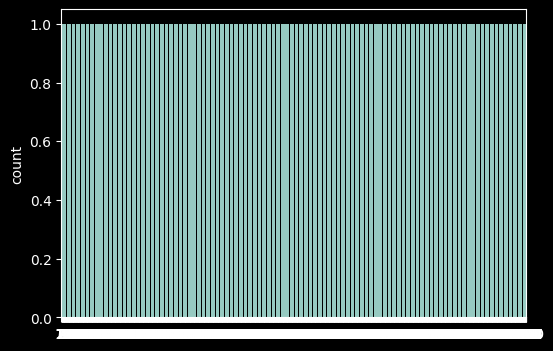

In [152]:
# Sets the figure size temporarily but has to be set again the next plot
plt.figure(figsize = (6,4))
# checking the label class distribution
sns.countplot(y_train)
plt.show()

In [153]:
y_train.value_counts()

2    1757
1     152
0      51
Name: labels, dtype: int64

In [154]:
#there are multiple sampling_startegy, select according to use-case
smote = SMOTE(sampling_strategy = 'auto')
X_train_sampled, y_train_sampled = smote.fit_resample(X_train, y_train)

In [155]:
y_train_sampled.value_counts()

1    1757
2    1757
0    1757
Name: labels, dtype: int64

In [156]:
X_train.shape
y_train.shape
X_train_sampled.shape
y_train_sampled.shape
X_test.shape
y_test.shape

(840,)

In [157]:
#Random Forest Classifier Operation
# importing the important libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
# create an instance of a Random Forest classifier
random_forest_model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
# training the Random Forest model on the sampled train dataset
random_forest_model.fit(np.array(X_train_sampled), y_train_sampled)
# pedicting the labels on the test set
y_predicted_randomforest = random_forest_model.predict(np.array(X_test))

In [158]:
# import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
39
# calculating the accuracy on train data
print('Accuracy Score on train data: ', metrics.accuracy_score(y_true = y_train_sampled,\
                                                               y_pred = random_forest_model.predict(X_train_sampled)))
# calculating the accuracy on test data
print('Accuracy Score on test data: ', metrics.accuracy_score(y_true = y_test, y_pred = y_predicted_randomforest))

Accuracy Score on train data:  0.9988616960728515
Accuracy Score on test data:  0.9702380952380952


In [159]:
#Performance Parameters
print("****** Random Forest Model Prediction on Test Data ******")
print("*********************************************************\n")
print("--------- Confusion Matrix ---------\n\n", confusion_matrix(y_test, y_predicted_randomforest))
print("\n------------------------------------")
print("Acurracy Score:", accuracy_score(y_test, y_predicted_randomforest))
print("------------------------------------")
print("\n------ Classification Report -------\n\n", classification_report(y_test, y_predicted_randomforest))
print("--------------------------------------------------------")

****** Random Forest Model Prediction on Test Data ******
*********************************************************

--------- Confusion Matrix ---------

 [[ 23   0   3]
 [  0  67   1]
 [ 16   5 725]]

------------------------------------
Acurracy Score: 0.9702380952380952
------------------------------------

------ Classification Report -------

               precision    recall  f1-score   support

           0       0.59      0.88      0.71        26
           1       0.93      0.99      0.96        68
           2       0.99      0.97      0.98       746

    accuracy                           0.97       840
   macro avg       0.84      0.95      0.88       840
weighted avg       0.98      0.97      0.97       840

--------------------------------------------------------


In [160]:
# model saving
import pickle
pickle.dump(random_forest_model, open("random_forest_model.pkl","wb"))